In [2]:
# QUESTION 1:
import numpy as np
import matplotlib.pyplot as plt

dta = np.load("anscombe.npy")
plt.scatter(dta[:,0], dta[:,1])
plt.show()


In [3]:
from scipy import stats
stats.linregress(dta[:,0],dta[:,1])

LinregressResult(slope=0.5000909090909091, intercept=3.0000909090909103, rvalue=0.8164205163448399, pvalue=0.00216962887307879, stderr=0.11790550059563408)

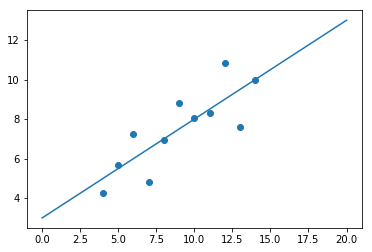

9.0 7.500909090909093 10.0 3.7520628099173554


In [4]:


plt.scatter(dta[:,0], dta[:,1])
x = np.linspace(0,20)
y = 3+0.5*x
plt.plot(x,y)
plt.show()

print(np.mean(dta[:,0]), np.mean(dta[:,1]), np.var(dta[:,0]), np.var(dta[:,1]))

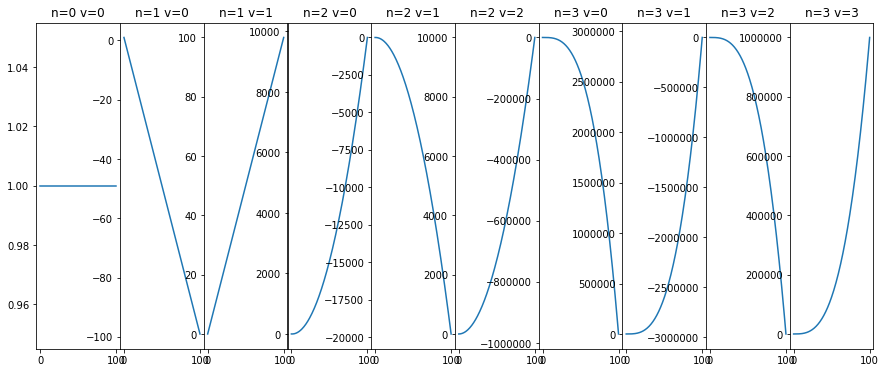

In [5]:
# QUESTION 2:

from scipy import special

fig, axs = plt.subplots(1,10, figsize=(15, 6))
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

x = np.linspace(0,100,200)
def b(x):
    i = 0
    for n in range(0,4):
        for v in range(0,n+1):
            y = special.binom(n, v)*(x**v)*(1-x)**(n-v)
            axs[i].plot(x,y)
            ttl = "n="+str(n)+" v="+str(v)
            axs[i].set_title(ttl)
            i+=1
b(x)
plt.show()



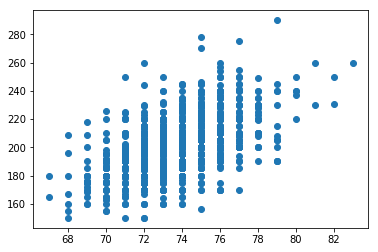

In [6]:
# QUESTION 3:
dta = np.load("MLB.npy")
plt.scatter(dta[:,0], dta[:,1])
plt.show()

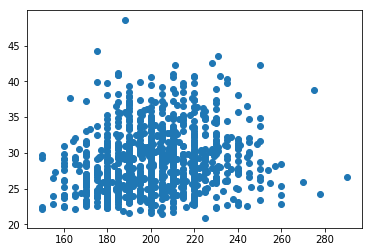

In [7]:
plt.scatter(dta[:,1], dta[:,2])
plt.show()

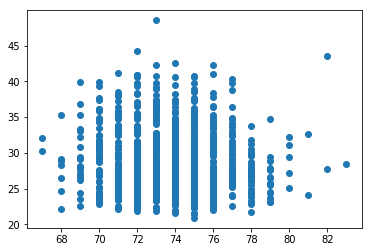

In [8]:
plt.scatter(dta[:,0], dta[:,2])
plt.show()

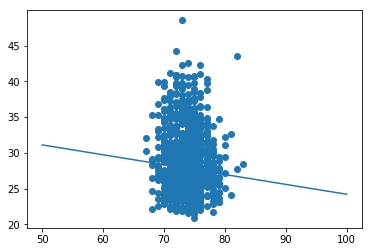

In [9]:
plt.scatter(dta[:,0], dta[:,2])
stats.linregress(dta[:,0], dta[:,2])
x=np.linspace(50,100)
y = 38+(-0.138)*x
plt.plot(x,y)
plt.show()

In [10]:
# QUESTION 4:
year, magnitude, longitude, latitude = np.load("earthquakes.npy").T

In [11]:
# 1. Earthquakes per year?
from itertools import groupby
year = [int(x) for x in year]

nums = [len(list(group)) for key, group in groupby(year)]
print(np.mean(nums))



1706.5


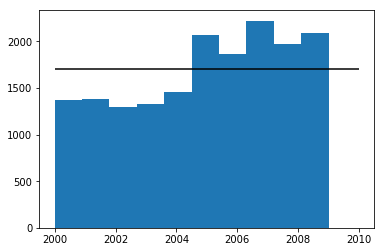

In [12]:
plt.hist(year)
plt.hlines(1706.5,2000,2010)
plt.show()


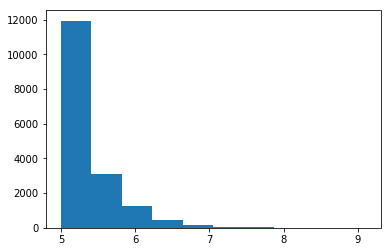

In [13]:
#2. Strong quakes vs weaker quakes?
plt.hist(magnitude)
plt.show()



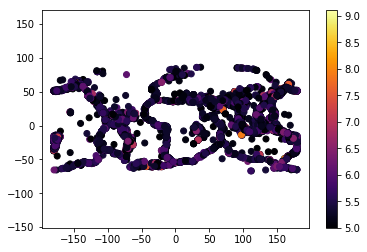

In [15]:
# 3. Quakes location?
plt.scatter(longitude, latitude, cmap = "inferno", c = magnitude,)
plt.colorbar()
plt.axis("equal")
plt.show()



Occur around fault lines

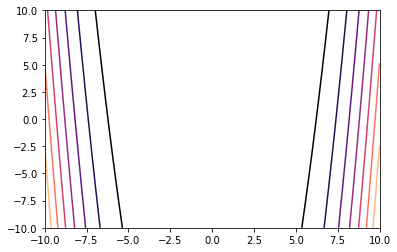

In [16]:
# 5
def f(x,y):
    return (1-x)**2 + 100*(y-x**2)**2

x = np.linspace(-10, 10, 100)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

plt.contour(X, Y, Z, 10, cmap="magma")
plt.show()



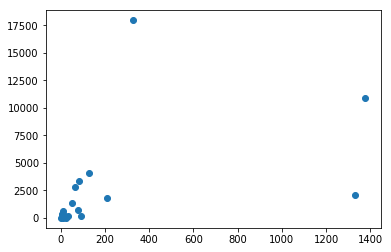

In [17]:
# 6
dta = np.load("countries.npy")
plt.scatter(dta[:,0], dta[:,1])
plt.show()

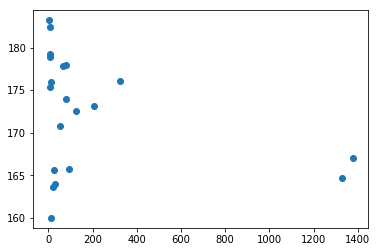

In [18]:
plt.scatter(dta[:,0], dta[:,2])
plt.show()

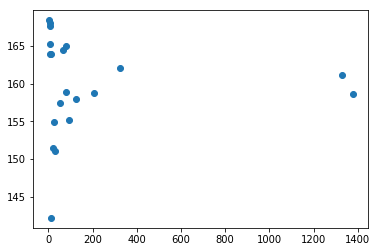

In [19]:
plt.scatter(dta[:,0], dta[:,3])
plt.show()

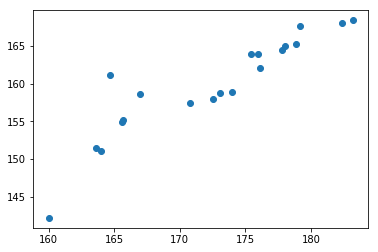

In [20]:
plt.scatter(dta[:,2], dta[:,3])
plt.show()


In [21]:
# Pandas problem set #1
# QUESTION 1:
import pandas as pd
x = list(range(0,50,2))
y = [n**2-1 for n in x]  
s = pd.Series(y, index=range(0,50,2))

In [22]:
# QUESTION 2:
def walk(prob, d=100):
    days = pd.date_range("1/1/2000", "12/31/2000", freq='D')
    s = np.zeros(len(days))
    s[0] = d
    c = [1,-1]
    for i in range(1, len(days)):
        s[i] = s[i-1] + np.random.choice(c, p = [prob, 1-prob])
    return(pd.Series(s, index=days))

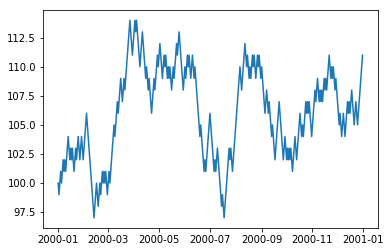

In [23]:
plt.plot(walk(0.5))
plt.show()

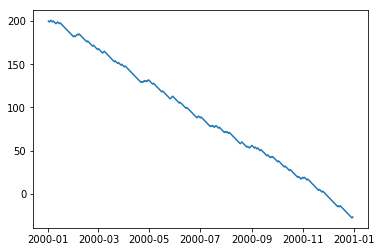

In [24]:
plt.plot(walk(0.2, 200))
plt.show()

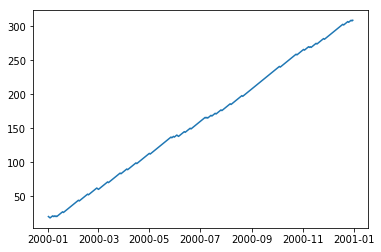

In [25]:
plt.plot(walk(0.9, 20))
plt.show()

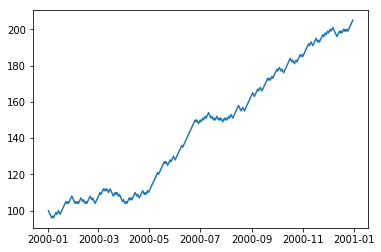

In [26]:
plt.plot(walk(0.65, 100))
plt.show()

In [27]:
# QUESTION 3:
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})



In [28]:
studentInfo.query("Age > 19 & Sex == 'M'")[["ID", "Name"]]

,ID,Name
0,0,Mylan
6,6,Matt


In [29]:
# QUESTION 4:
pd.merge(studentInfo, otherInfo, on="ID")



,Age,Class,ID,Name,Sex,Financial_Aid,GPA
0,20,Sp,0,Mylan,M,y,3.8
1,21,Se,1,Regan,F,n,3.5
2,18,Fr,2,Justin,M,n,3.0
3,22,Se,3,Jess,F,y,3.9
4,19,Sp,4,Jason,M,n,2.8
5,20,J,5,Remi,F,n,2.9
6,20,J,6,Matt,M,n,3.8
7,19,J,7,Alexander,M,y,3.4
8,20,Se,8,JeanMarie,F,n,3.7


In [35]:
ls

anscombe.npy           earthquakes.npy      More_ps2.ipynb  payems.csv
countries.npy          FARS.npy             Pandas1.pdf     ps_2.py
crime_data.txt         finances.csv         Pandas2.pdf     titanic.csv
DataVis_probset.pdf    lipids.csv           Pandas3.pdf     website_traffic.csv
DataVisualization.pdf  MatplotlibIntro.pdf  Pandas4.pdf
DJIA.csv               MLB.npy              paychecks.csv
